In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('india_housing_prices.csv')
print(df.head())


   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8                 1   
2    

In [4]:
print(df.info())
print(df.describe())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

In [5]:
df.isnull().sum()

,0
ID,0
State,0
City,0
Locality,0
Property_Type,0
BHK,0
Size_in_SqFt,0
Price_in_Lakhs,0
Price_per_SqFt,0
Year_Built,0


In [6]:
df.duplicated().sum()

np.int64(0)

/tmp/ipython-input-803474005.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_price.index, y=city_price.values, palette="viridis")


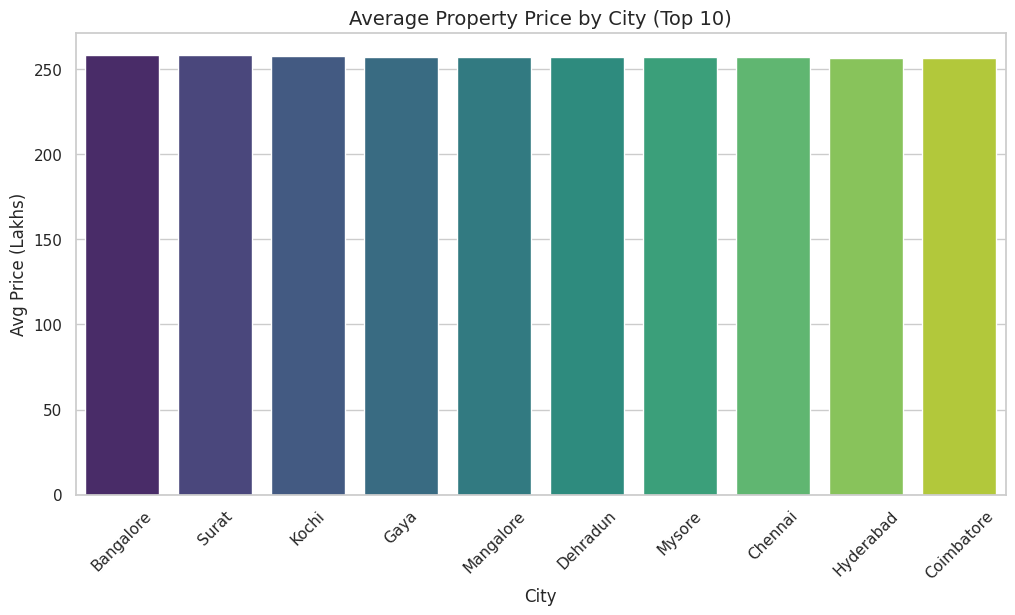

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
city_price = df.groupby("City")["Price_in_Lakhs"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=city_price.index, y=city_price.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Property Price by City (Top 10)", fontsize=14)
plt.ylabel("Avg Price (Lakhs)")
plt.show()

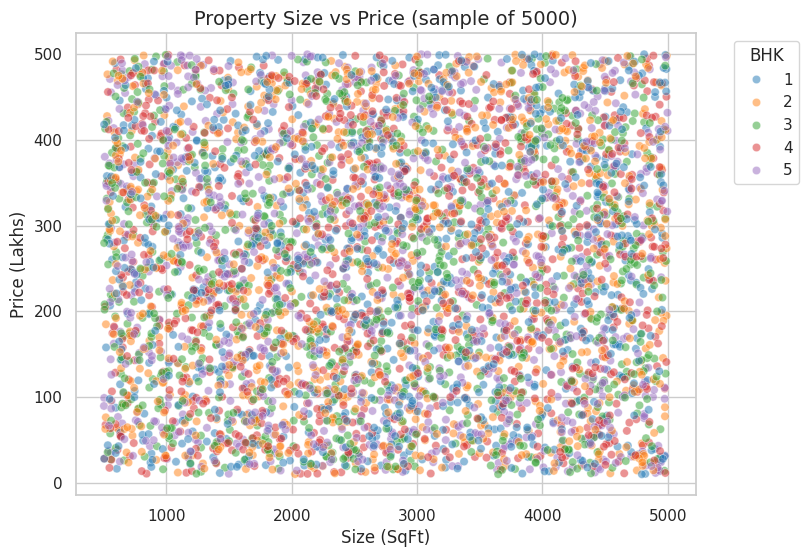

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(5000), x="Size_in_SqFt", y="Price_in_Lakhs", hue="BHK", alpha=0.5, palette="tab10")
plt.title("Property Size vs Price (sample of 5000)", fontsize=14)
plt.xlabel("Size (SqFt)")
plt.ylabel("Price (Lakhs)")
plt.legend(title="BHK", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

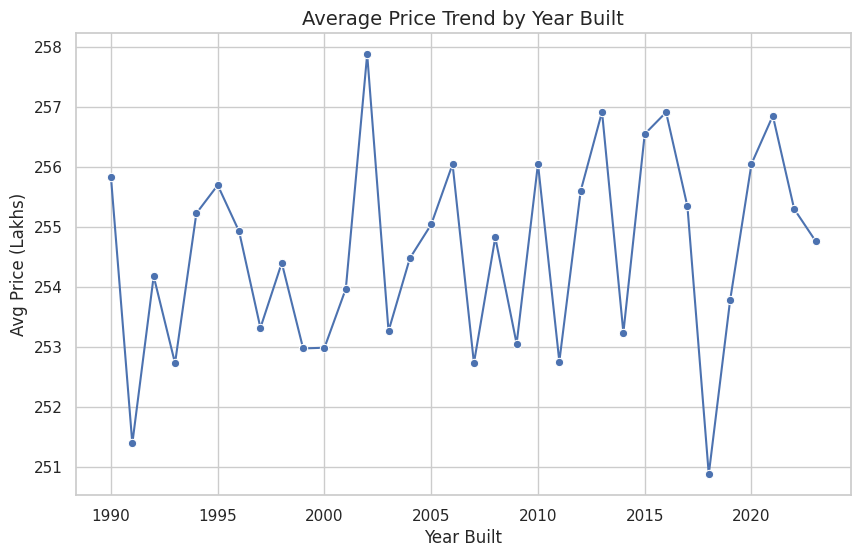

In [9]:
year_price = df.groupby("Year_Built")["Price_in_Lakhs"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=year_price, x="Year_Built", y="Price_in_Lakhs", marker="o")
plt.title("Average Price Trend by Year Built", fontsize=14)
plt.xlabel("Year Built")
plt.ylabel("Avg Price (Lakhs)")
plt.show()

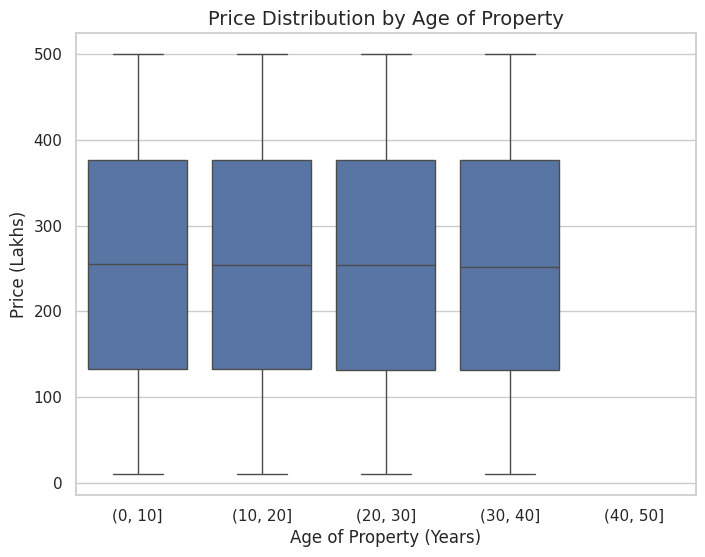

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x=pd.cut(df["Age_of_Property"], bins=[0,10,20,30,40,50]), y=df["Price_in_Lakhs"])
plt.title("Price Distribution by Age of Property", fontsize=14)
plt.xlabel("Age of Property (Years)")
plt.ylabel("Price (Lakhs)")
plt.show()


/tmp/ipython-input-984831034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Parking_Space", y="Price_in_Lakhs", estimator=lambda x: sum(x)/len(x), palette="Set2")


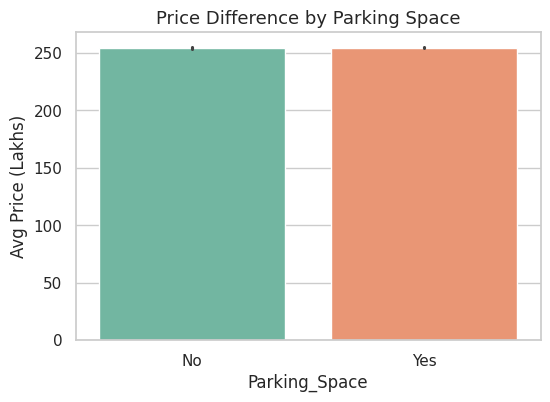

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Parking_Space", y="Price_in_Lakhs", estimator=lambda x: sum(x)/len(x), palette="Set2")
plt.title("Price Difference by Parking Space", fontsize=13)
plt.ylabel("Avg Price (Lakhs)")
plt.show()

/tmp/ipython-input-3045325973.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Has_Pool", y="Price_in_Lakhs", estimator=lambda x: sum(x)/len(x), palette="coolwarm")


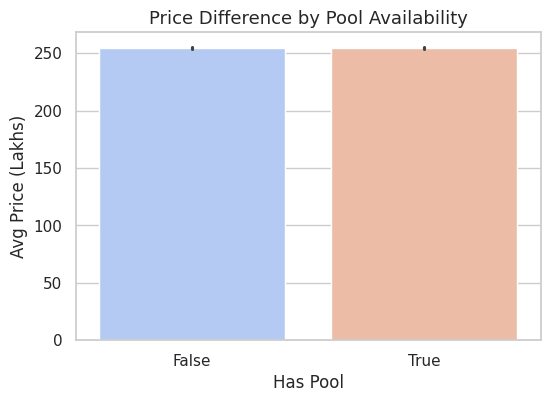

In [12]:
df["Has_Pool"] = df["Amenities"].str.contains("Pool", case=False, na=False)

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Has_Pool", y="Price_in_Lakhs", estimator=lambda x: sum(x)/len(x), palette="coolwarm")
plt.title("Price Difference by Pool Availability", fontsize=13)
plt.ylabel("Avg Price (Lakhs)")
plt.xlabel("Has Pool")
plt.show()